In [26]:
import pandas as pd
import rdkit

In [2]:
cancer_name = 'breast_cancer'
assays_id = 639
assays_csv = f'../data/raw/{cancer_name}/{assays_id}/{assays_id}.csv'
assays_sdf = f'../data/raw/{cancer_name}/{assays_id}/{assays_id}.sdf'

In [3]:
df_labels = pd.read_csv(assays_csv)

C:\Users\isado\anaconda3\envs\cancer-drugs-ml\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (0,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_labels = df_labels.drop([0, 1, 2])
df_labels.head(10)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,% of Activity,F665,F620,FRET Signal,Comments
3,1,4257611.0,800354.0,Inactive,98.0,NaN,NaN,98.04,400,8898,450,no comment
4,2,4261287.0,2948508.0,Inactive,100.0,NaN,NaN,100.07,347,7565,459,no comment
5,3,4256064.0,690911.0,Inactive,75.0,NaN,NaN,74.64,170,4917,346,Possible Fluorescence Artifact
6,4,4262821.0,1293242.0,Inactive,86.0,NaN,NaN,86.34,323,8113,398,no comment
7,5,4262380.0,2972431.0,Inactive,93.0,NaN,NaN,93.09,365,8535,428,no comment
8,6,4255054.0,976214.0,Inactive,79.0,NaN,NaN,79.36,338,9212,367,Possible Fluorescence Artifact
9,7,4256335.0,977640.0,Inactive,101.0,NaN,NaN,100.52,363,7873,461,no comment
10,8,4257172.0,2198533.0,Inactive,93.0,NaN,NaN,93.32,397,9250,429,Possible Fluorescence Artifact
11,9,4263339.0,2914925.0,Inactive,106.0,NaN,NaN,106.14,423,8708,486,no comment
12,10,4259448.0,976855.0,Inactive,97.0,NaN,NaN,96.69,397,8935,444,Possible Fluorescence Artifact


In [5]:
df_labels = df_labels[['PUBCHEM_SID', 'PUBCHEM_ACTIVITY_OUTCOME']]

In [6]:
df_labels.head(10)

,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME
3,4257611.0,Inactive
4,4261287.0,Inactive
5,4256064.0,Inactive
6,4262821.0,Inactive
7,4262380.0,Inactive
8,4255054.0,Inactive
9,4256335.0,Inactive
10,4257172.0,Inactive
11,4263339.0,Inactive
12,4259448.0,Inactive


In [7]:
df_labels['ACTIVITY'] = (df_labels['PUBCHEM_ACTIVITY_OUTCOME'] =='Active').astype(float)

In [8]:
df_labels

,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,ACTIVITY
3,4257611.0,Inactive,0.0
4,4261287.0,Inactive,0.0
5,4256064.0,Inactive,0.0
6,4262821.0,Inactive,0.0
7,4262380.0,Inactive,0.0
...,...,...,...
86104,14743395.0,Inactive,0.0
86105,14735582.0,Inactive,0.0
86106,14738043.0,Inactive,0.0
86107,14735632.0,Inactive,0.0


In [9]:
df_labels.query('ACTIVITY == True')

,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,ACTIVITY
39,3714184.0,Active,1.0
48,4261874.0,Active,1.0
80,4245703.0,Active,1.0
96,862513.0,Active,1.0
102,3717174.0,Active,1.0
...,...,...,...
85855,14730230.0,Active,1.0
85864,14742851.0,Active,1.0
85928,14733070.0,Active,1.0
85930,14741429.0,Active,1.0


In [10]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from imblearn.under_sampling import RandomUnderSampler

In [11]:
mols = Chem.SDMolSupplier(assays_sdf)
df_features = pd.DataFrame()
for mol in mols:
    if mol == None:
        break
    mol_features={}
    mol_features['PUBCHEM_SID']=mol.GetPropsAsDict()['PUBCHEM_SUBSTANCE_ID']
    mol_features['min_abs_partial_charge'] = Descriptors.MinAbsPartialCharge(mol)
    mol_features['tpsa'] = Descriptors.TPSA(mol) 
    mol_features['exact_mol_wt'] = Descriptors.ExactMolWt(mol)
    mol_features['max_abs_partial_charge'] = Descriptors.MaxAbsPartialCharge(mol) 
    mol_features['num_radical_eletrons'] = Descriptors.NumRadicalElectrons(mol)
    mol_features['mol_log_p'] = Descriptors.MolLogP(mol)
    mol_features['mol_mr'] = Descriptors.MolMR(mol)
    mol_features['mol_wt'] = Descriptors.MolWt(mol)
    mol_features['heavy_atom_count'] = Descriptors.HeavyAtomCount(mol)
    mol_features['heavy_atom_mol_wt'] = Descriptors.HeavyAtomMolWt(mol)
    mol_features['nhoh_count'] = Descriptors.NHOHCount(mol)
    mol_features['no_count'] = Descriptors.NOCount(mol)
    mol_features['num_h_acceptors'] = Descriptors.NumHAcceptors(mol)
    mol_features['num_h_donors'] = Descriptors.NumHDonors(mol)
    mol_features['num_hetero_atoms'] = Descriptors.NumHeteroatoms(mol)
    mol_features['num_rotatable_bonds'] = Descriptors.NumRotatableBonds(mol)
    mol_features['num_valence_electrons'] = Descriptors.NumValenceElectrons(mol)
    mol_features['ring_count'] = Descriptors.RingCount(mol)
    mol_features['fp_density_morgan1'] = rdkit.Chem.Descriptors.FpDensityMorgan1(mol)
    mol_features['fp_density_morgan2'] = rdkit.Chem.Descriptors.FpDensityMorgan2(mol)
    mol_features['fp_density_morgan3'] = rdkit.Chem.Descriptors.FpDensityMorgan3(mol)
    mol_features['balabanj'] = rdkit.Chem.GraphDescriptors.BalabanJ(mol)
    mol_features['bertzct'] = rdkit.Chem.GraphDescriptors.BertzCT(mol)
    mol_features['ipc'] = rdkit.Chem.GraphDescriptors.Ipc(mol)
    mol_features['chi0'] = rdkit.Chem.GraphDescriptors.Chi0(mol)
    mol_features['chi1'] = rdkit.Chem.GraphDescriptors.Chi1(mol)
    mol_features['kappa1'] = rdkit.Chem.GraphDescriptors.Kappa1(mol)
    mol_features['hallkier_alpha'] = rdkit.Chem.GraphDescriptors.HallKierAlpha(mol)
    df_features = df_features.append(mol_features, ignore_index=True)

In [12]:
df_features.head(10)

,PUBCHEM_SID,balabanj,bertzct,chi0,chi1,exact_mol_wt,fp_density_morgan1,fp_density_morgan2,fp_density_morgan3,hallkier_alpha,...,nhoh_count,no_count,num_h_acceptors,num_h_donors,num_hetero_atoms,num_radical_eletrons,num_rotatable_bonds,num_valence_electrons,ring_count,tpsa
0,842121.0,4.839995e-06,455.575868,16.424439,10.403997,356.111455,1.217391,1.869565,2.434783,-1.51,...,2.0,5.0,4.0,2.0,9.0,0.0,9.0,132.0,1.0,59.59
1,842122.0,2.083331e-06,583.676655,15.907567,11.347668,351.182588,1.166667,1.916667,2.625000,-1.50,...,0.0,6.0,6.0,0.0,7.0,0.0,7.0,132.0,3.0,56.07
2,842123.0,2.803330e-06,763.246281,19.493353,12.815628,421.149237,1.250000,1.964286,2.607143,-1.75,...,1.0,7.0,7.0,1.0,11.0,0.0,6.0,156.0,3.0,76.30
3,842124.0,4.874999e-07,571.749178,19.363597,12.379918,368.174750,0.961538,1.500000,2.000000,-2.48,...,3.0,7.0,4.0,3.0,8.0,0.0,5.0,144.0,2.0,106.94
4,842125.0,2.083332e-06,639.421293,16.070703,11.292025,347.128821,1.041667,1.666667,2.250000,-1.88,...,0.0,4.0,4.0,0.0,5.0,0.0,5.0,128.0,3.0,38.77
5,842126.0,1.999998e-06,427.389860,13.501789,9.292025,301.108086,1.400000,2.150000,2.900000,-1.46,...,1.0,5.0,5.0,1.0,6.0,0.0,6.0,112.0,2.0,56.79
6,842127.0,2.879997e-06,551.124102,16.656490,11.079719,419.061131,1.250000,1.958333,2.583333,-1.31,...,1.0,6.0,4.0,1.0,8.0,0.0,5.0,134.0,2.0,61.88
7,842128.0,1.763332e-06,507.068437,14.872033,10.132664,323.165207,1.227273,1.909091,2.590909,-1.06,...,0.0,3.0,3.0,0.0,4.0,0.0,2.0,122.0,3.0,29.54
8,842129.0,7.538888e-07,383.283806,18.535169,11.272963,348.189651,1.083333,1.625000,2.041667,-1.71,...,3.0,9.0,6.0,3.0,9.0,0.0,7.0,140.0,1.0,127.61
9,842130.0,1.919998e-06,493.350894,15.416003,10.711944,336.196841,1.130435,1.739130,2.347826,-1.06,...,1.0,3.0,2.0,1.0,4.0,0.0,5.0,128.0,3.0,32.34


In [13]:
df_joined = pd.merge(df_features, df_labels, on = ['PUBCHEM_SID'] )

In [14]:
df_joined.head(10)

,PUBCHEM_SID,balabanj,bertzct,chi0,chi1,exact_mol_wt,fp_density_morgan1,fp_density_morgan2,fp_density_morgan3,hallkier_alpha,...,num_h_acceptors,num_h_donors,num_hetero_atoms,num_radical_eletrons,num_rotatable_bonds,num_valence_electrons,ring_count,tpsa,PUBCHEM_ACTIVITY_OUTCOME,ACTIVITY
0,842121.0,4.839995e-06,455.575868,16.424439,10.403997,356.111455,1.217391,1.869565,2.434783,-1.51,...,4.0,2.0,9.0,0.0,9.0,132.0,1.0,59.59,Inactive,0.0
1,842122.0,2.083331e-06,583.676655,15.907567,11.347668,351.182588,1.166667,1.916667,2.625000,-1.50,...,6.0,0.0,7.0,0.0,7.0,132.0,3.0,56.07,Inactive,0.0
2,842123.0,2.803330e-06,763.246281,19.493353,12.815628,421.149237,1.250000,1.964286,2.607143,-1.75,...,7.0,1.0,11.0,0.0,6.0,156.0,3.0,76.30,Inactive,0.0
3,842124.0,4.874999e-07,571.749178,19.363597,12.379918,368.174750,0.961538,1.500000,2.000000,-2.48,...,4.0,3.0,8.0,0.0,5.0,144.0,2.0,106.94,Inactive,0.0
4,842125.0,2.083332e-06,639.421293,16.070703,11.292025,347.128821,1.041667,1.666667,2.250000,-1.88,...,4.0,0.0,5.0,0.0,5.0,128.0,3.0,38.77,Inactive,0.0
5,842126.0,1.999998e-06,427.389860,13.501789,9.292025,301.108086,1.400000,2.150000,2.900000,-1.46,...,5.0,1.0,6.0,0.0,6.0,112.0,2.0,56.79,Inactive,0.0
6,842127.0,2.879997e-06,551.124102,16.656490,11.079719,419.061131,1.250000,1.958333,2.583333,-1.31,...,4.0,1.0,8.0,0.0,5.0,134.0,2.0,61.88,Inactive,0.0
7,842128.0,1.763332e-06,507.068437,14.872033,10.132664,323.165207,1.227273,1.909091,2.590909,-1.06,...,3.0,0.0,4.0,0.0,2.0,122.0,3.0,29.54,Inactive,0.0
8,842129.0,7.538888e-07,383.283806,18.535169,11.272963,348.189651,1.083333,1.625000,2.041667,-1.71,...,6.0,3.0,9.0,0.0,7.0,140.0,1.0,127.61,Inactive,0.0
9,842130.0,1.919998e-06,493.350894,15.416003,10.711944,336.196841,1.130435,1.739130,2.347826,-1.06,...,2.0,1.0,4.0,0.0,5.0,128.0,3.0,32.34,Inactive,0.0


In [15]:
X = df_joined.drop(['PUBCHEM_SID', 'ACTIVITY', 'PUBCHEM_ACTIVITY_OUTCOME'], axis=1)
y = df_joined['ACTIVITY']

In [16]:
ros = RandomUnderSampler()
X_resampled, y_resampled = ros.fit_resample(X,y)

In [17]:
X_resampled

,balabanj,bertzct,chi0,chi1,exact_mol_wt,fp_density_morgan1,fp_density_morgan2,fp_density_morgan3,hallkier_alpha,heavy_atom_count,...,nhoh_count,no_count,num_h_acceptors,num_h_donors,num_hetero_atoms,num_radical_eletrons,num_rotatable_bonds,num_valence_electrons,ring_count,tpsa
0,1.997720,615.097841,16.982763,10.917923,319.153206,1.347826,2.043478,2.695652,-2.57,23.0,...,2.0,7.0,4.0,2.0,7.0,0.0,6.0,124.0,2.0,87.74
1,1.754591,682.609479,14.775656,10.016474,285.100108,1.476190,2.285714,3.000000,-2.14,21.0,...,1.0,5.0,3.0,1.0,5.0,0.0,2.0,108.0,4.0,66.84
2,1.683165,565.641309,17.363597,11.596555,332.173607,1.125000,1.791667,2.416667,-2.37,24.0,...,1.0,6.0,4.0,1.0,6.0,0.0,6.0,130.0,2.0,75.71
3,1.513612,1288.149356,24.622745,17.084050,493.141990,1.000000,1.800000,2.514286,-4.25,35.0,...,2.0,10.0,9.0,2.0,11.0,0.0,10.0,180.0,4.0,120.51
4,1.632612,1108.435400,17.509861,12.775990,364.072703,1.038462,1.884615,2.769231,-3.25,26.0,...,1.0,6.0,6.0,1.0,7.0,0.0,3.0,128.0,5.0,60.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,1.853078,779.816491,17.267220,11.452397,361.101561,1.333333,2.041667,2.708333,-1.85,24.0,...,2.0,4.0,5.0,1.0,6.0,0.0,5.0,126.0,3.0,59.22
2298,1.762085,738.926445,13.949383,9.720347,364.929216,1.200000,2.100000,2.800000,-1.57,20.0,...,1.0,4.0,5.0,1.0,7.0,0.0,3.0,100.0,3.0,54.88
2299,1.438380,928.621389,19.769374,13.635362,398.104876,1.071429,1.821429,2.535714,-3.33,28.0,...,2.0,8.0,7.0,2.0,9.0,0.0,7.0,144.0,3.0,106.35
2300,1.686371,1079.178358,22.543241,14.794933,451.101348,1.129032,1.806452,2.451613,-3.21,31.0,...,1.0,8.0,8.0,1.0,11.0,0.0,9.0,164.0,3.0,107.31


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5677083333333334

In [21]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5121527777777778

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6822916666666666

In [23]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\isado\anaconda3\envs\cancer-drugs-ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6927083333333334

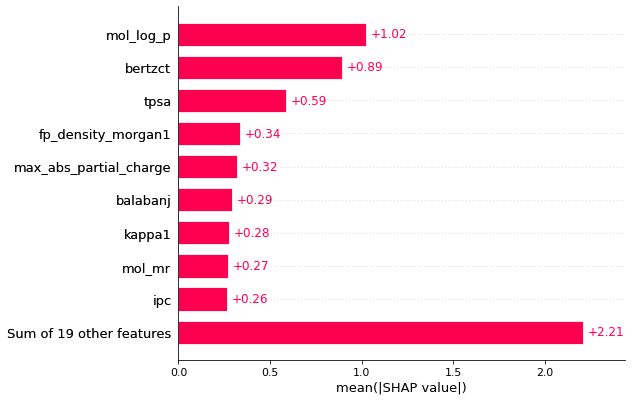

In [24]:
import shap 

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.plots.bar(shap_values)

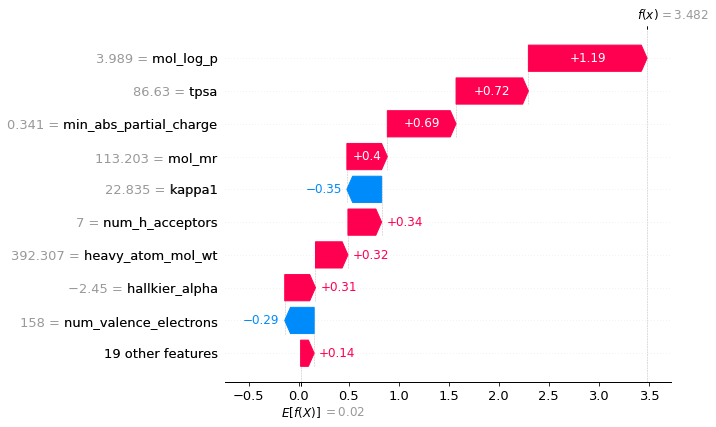

In [25]:
shap.plots.waterfall(shap_values[0])